# Image Classification Using CNN with the use of the Cifar10 dataset.(Google Colab)

In [56]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt 
import numpy as np

In [57]:
datasets.cifar10.load_data()

((array([[[[ 59,  62,  63],
           [ 43,  46,  45],
           [ 50,  48,  43],
           ...,
           [158, 132, 108],
           [152, 125, 102],
           [148, 124, 103]],
  
          [[ 16,  20,  20],
           [  0,   0,   0],
           [ 18,   8,   0],
           ...,
           [123,  88,  55],
           [119,  83,  50],
           [122,  87,  57]],
  
          [[ 25,  24,  21],
           [ 16,   7,   0],
           [ 49,  27,   8],
           ...,
           [118,  84,  50],
           [120,  84,  50],
           [109,  73,  42]],
  
          ...,
  
          [[208, 170,  96],
           [201, 153,  34],
           [198, 161,  26],
           ...,
           [160, 133,  70],
           [ 56,  31,   7],
           [ 53,  34,  20]],
  
          [[180, 139,  96],
           [173, 123,  42],
           [186, 144,  30],
           ...,
           [184, 148,  94],
           [ 97,  62,  34],
           [ 83,  53,  34]],
  
          [[177, 144, 116],
           [16

In [58]:
(X_train,y_train), (X_test,y_test)=datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [59]:
X_test.shape

(10000, 32, 32, 3)

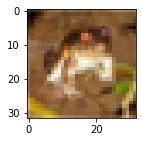

In [60]:
plt.figure(figsize=(5,2))
plt.imshow(X_train[0])

# The labels of the dataset

In [61]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [62]:
classes[0]

'airplane'

In [63]:
y_train.shape

(50000, 1)

In [64]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

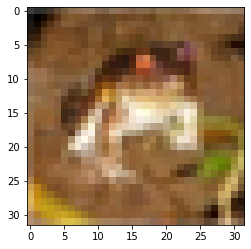

In [65]:
plt.imshow(X_train[0]) # 6 -> Frog

In [66]:
y_train.shape

(50000, 1)

In [67]:
y_train=y_train.reshape(-1,) # Reshaped the 2D array into 1D array. '-1' means we dont want to change that dimension
y_train.shape

(50000,)

In [68]:
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [69]:
classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [70]:
classes[9]

'truck'

## Creating a plotting/visualizing function to see the images

In [71]:
def plot_samples(X,y, index):
  plt.figure(figsize=(15,2))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])

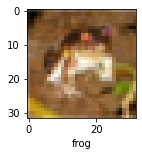

In [72]:
plot_samples(X_train,y_train,0)

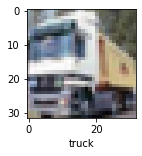

In [73]:
plot_samples(X_train,y_train,1)

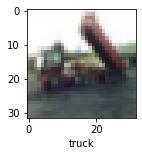

In [74]:
plot_samples(X_train,y_train,2)

In [75]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [76]:
X_train[0]/255

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [77]:
X_train=X_train/255
X_test=X_test/255

# Testing the dataset on ANN(Artifical Neural Network)

In [78]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 18s 11ms/step - loss: 1.8072 - accuracy: 0.3561
Epoch 2/10
1563/1563 [==============================] - 17s 11ms/step - loss: 1.6211 - accuracy: 0.4260
Epoch 3/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.5381 - accuracy: 0.4571
Epoch 4/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.4817 - accuracy: 0.4801
Epoch 5/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.4329 - accuracy: 0.4955
Epoch 6/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.3876 - accuracy: 0.5116
Epoch 7/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.3492 - accuracy: 0.5264
Epoch 8/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.3143 - accuracy: 0.5368
Epoch 9/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.2807 - accuracy: 0.5495
Epoch 10/10
1563/1563 [==============================] - 10s 6ms/step -

In [79]:
ann.evaluate(X_test,y_test)

313/313 [==============================] - 2s 5ms/step - loss: 1.3886 - accuracy: 0.5071


[1.388640284538269, 0.507099986076355]

In [80]:
from sklearn.metrics import confusion_matrix , classification_report
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.43      0.78      0.55      1000
           1       0.73      0.54      0.62      1000
           2       0.43      0.40      0.41      1000
           3       0.43      0.19      0.27      1000
           4       0.52      0.35      0.42      1000
           5       0.40      0.50      0.44      1000
           6       0.63      0.48      0.55      1000
           7       0.46      0.70      0.56      1000
           8       0.68      0.53      0.59      1000
           9       0.56      0.59      0.58      1000

    accuracy                           0.51     10000
   macro avg       0.53      0.51      0.50     10000
weighted avg       0.53      0.51      0.50     10000



# Testing the dataset on CNN(Convolutional Neural Network)

In [81]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])


cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

cnn.fit(X_train, y_train, epochs=10)



Epoch 1/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.4497 - accuracy: 0.4800
Epoch 2/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.0971 - accuracy: 0.6175
Epoch 3/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.9650 - accuracy: 0.6639
Epoch 4/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.8815 - accuracy: 0.6947
Epoch 5/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.8141 - accuracy: 0.7177
Epoch 6/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.7639 - accuracy: 0.7332
Epoch 7/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.7125 - accuracy: 0.7517
Epoch 8/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.6713 - accuracy: 0.7653
Epoch 9/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.6318 - accuracy: 0.7785
Epoch 10/10
1563/1563 [==============================] - 9s 6ms/step - loss: 

In [82]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.9555 - accuracy: 0.6934


[0.9555220007896423, 0.6934000253677368]

In [83]:
y_test=y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

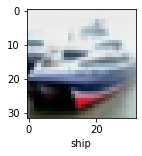

In [84]:
plot_sample(X_test,y_test,1)

In [85]:
y_pred=cnn.predict(X_test)
y_pred[:5] # Probability distribution

array([[1.1781682e-03, 4.4343169e-06, 6.6268083e-04, 3.4669963e-01,
        2.8716706e-04, 4.7849495e-02, 6.6328904e-04, 1.5193874e-05,
        6.0260522e-01, 3.4701035e-05],
       [1.2874456e-06, 5.7873052e-01, 2.3020610e-09, 9.8233208e-09,
        2.0395869e-13, 4.7327295e-13, 3.5864308e-11, 6.7289361e-14,
        4.2126760e-01, 6.0108636e-07],
       [1.8344881e-02, 7.0661402e-01, 8.7035442e-05, 1.2427052e-03,
        5.5888700e-05, 9.4401505e-05, 3.3664321e-05, 7.6189848e-05,
        2.5957730e-01, 1.3873986e-02],
       [6.0487455e-01, 7.2174715e-03, 3.2041315e-04, 1.6382216e-03,
        6.5602289e-05, 3.0203428e-06, 6.0989505e-06, 6.1143951e-06,
        3.8534996e-01, 5.1861675e-04],
       [3.8058363e-07, 5.5273317e-06, 1.0819169e-02, 2.7990781e-02,
        5.7464451e-01, 2.5297934e-03, 3.8399723e-01, 1.6420709e-06,
        1.0940684e-05, 9.4788611e-08]], dtype=float32)

In [86]:
np.argmax(y_pred[0])

8

In [87]:
y_classes=[np.argmax(element) for element in y_pred]
y_classes[:5]

[8, 1, 1, 0, 4]

In [88]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

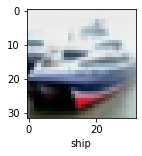

In [89]:
plot_sample(X_test,y_test,1) # Actual Value

In [90]:
classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [91]:
classes[y_classes[1]] # Predicted Value

'automobile'

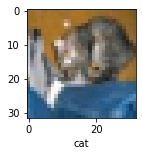

In [92]:
plot_sample(X_test,y_test,0)

In [93]:
classes[y_classes[0]]

'ship'

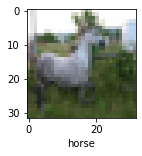

In [94]:
plot_sample(X_test,y_test,69)

In [95]:
classes[y_classes[69]]

'deer'

In [96]:
y_classes # Predicted Values

[8,
 1,
 1,
 0,
 4,
 6,
 1,
 6,
 3,
 1,
 5,
 9,
 5,
 7,
 9,
 8,
 5,
 7,
 8,
 6,
 7,
 2,
 4,
 9,
 4,
 2,
 4,
 0,
 9,
 6,
 6,
 5,
 4,
 3,
 9,
 1,
 7,
 1,
 9,
 5,
 8,
 6,
 3,
 6,
 0,
 9,
 2,
 7,
 7,
 2,
 9,
 8,
 6,
 3,
 8,
 8,
 7,
 2,
 5,
 6,
 7,
 5,
 6,
 3,
 6,
 2,
 1,
 2,
 5,
 4,
 2,
 3,
 8,
 8,
 0,
 2,
 0,
 3,
 3,
 8,
 8,
 1,
 1,
 7,
 2,
 7,
 4,
 0,
 8,
 9,
 0,
 2,
 8,
 6,
 4,
 6,
 6,
 0,
 0,
 7,
 4,
 2,
 6,
 3,
 1,
 1,
 3,
 6,
 8,
 5,
 7,
 0,
 2,
 2,
 1,
 4,
 0,
 4,
 6,
 1,
 8,
 3,
 1,
 2,
 8,
 0,
 8,
 3,
 3,
 0,
 4,
 1,
 8,
 9,
 1,
 2,
 7,
 7,
 2,
 8,
 3,
 5,
 6,
 5,
 8,
 9,
 3,
 6,
 6,
 2,
 8,
 9,
 6,
 0,
 0,
 5,
 6,
 9,
 3,
 4,
 2,
 1,
 6,
 6,
 8,
 0,
 8,
 4,
 5,
 0,
 9,
 9,
 1,
 8,
 9,
 9,
 3,
 7,
 5,
 0,
 0,
 5,
 2,
 8,
 5,
 8,
 2,
 3,
 2,
 8,
 5,
 8,
 3,
 1,
 7,
 2,
 8,
 8,
 7,
 8,
 5,
 8,
 8,
 7,
 1,
 3,
 8,
 5,
 7,
 9,
 6,
 9,
 5,
 7,
 8,
 0,
 7,
 9,
 8,
 7,
 5,
 7,
 9,
 5,
 3,
 9,
 3,
 2,
 3,
 6,
 3,
 1,
 3,
 8,
 8,
 0,
 4,
 0,
 5,
 2,
 1,
 1,
 8,
 9,
 0,
 8,
 1,
 8,
 2,
 0,


In [97]:
print('Classification Report: \n', classification_report(y_test,y_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.72      0.75      0.73      1000
           1       0.75      0.86      0.80      1000
           2       0.56      0.65      0.60      1000
           3       0.53      0.49      0.51      1000
           4       0.70      0.56      0.62      1000
           5       0.63      0.55      0.59      1000
           6       0.75      0.75      0.75      1000
           7       0.73      0.73      0.73      1000
           8       0.72      0.87      0.79      1000
           9       0.84      0.72      0.78      1000

    accuracy                           0.69     10000
   macro avg       0.69      0.69      0.69     10000
weighted avg       0.69      0.69      0.69     10000

